## Exploratory Data Analysis

We do some exploratory data analys of the cleaned rat sightings data and rat inspection data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [5]:
rs = pd.read_csv('../scr/data/rat_sightings_data/Rat_Sightings_Cleaned.csv')

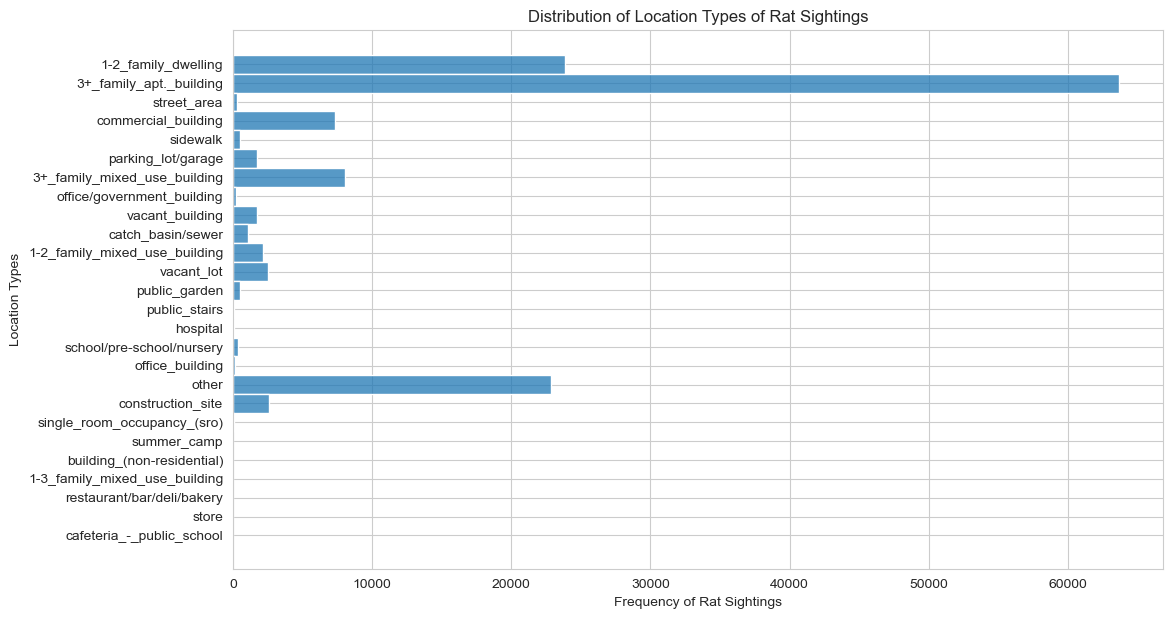

In [17]:
# Histogram of location_type
plt.figure(figsize=(12,7))

sns.set_style("whitegrid")
sns.histplot(y = rs["location_type"], bins=range(0, len(rs["location_type"])))
plt.title("Distribution of Location Types of Rat Sightings")
plt.xlabel("Frequency of Rat Sightings")
plt.ylabel("Location Types")
plt.show()

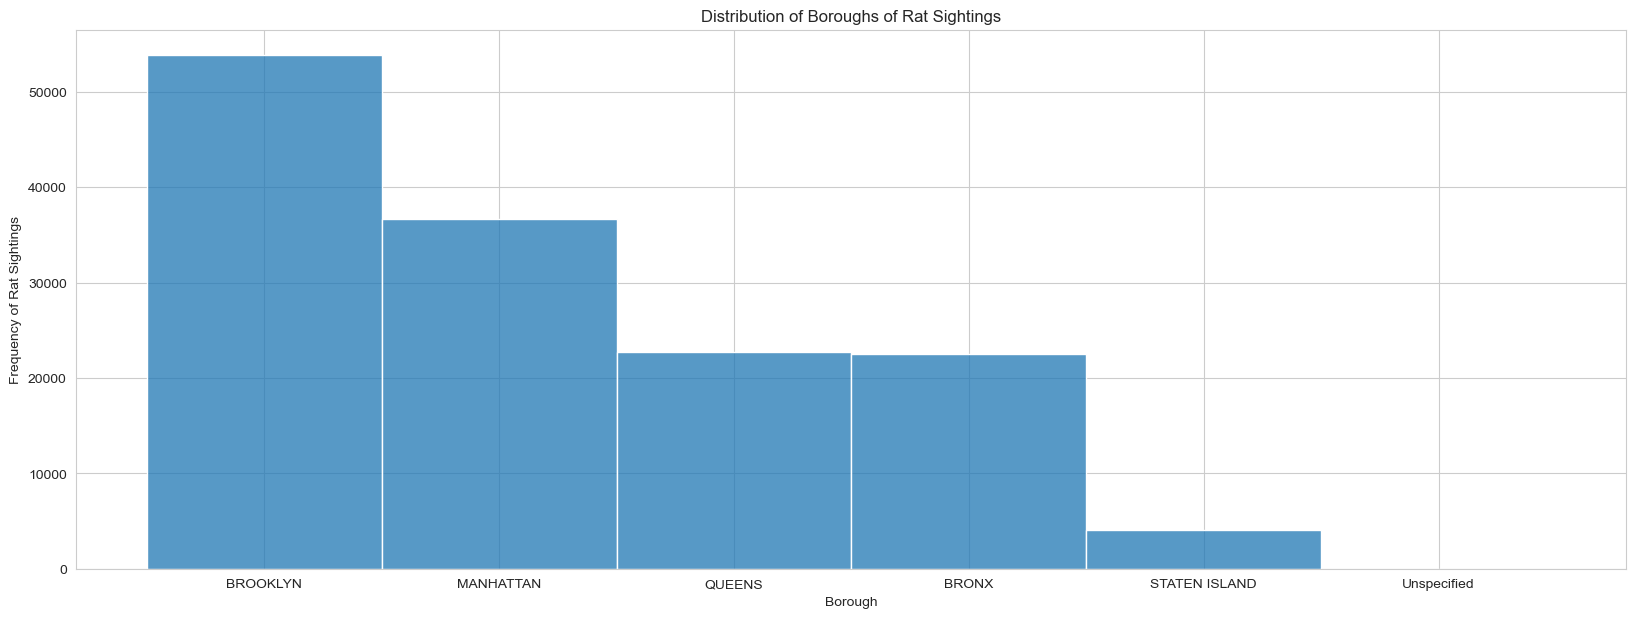

In [ ]:
# Histogram by borough 
plt.figure(figsize=(20,7))

sns.set_style("whitegrid")
sns.histplot(rs["borough"], bins=range(0, len(rs["borough"])))
plt.title("Distribution of Boroughs of Rat Sightings")
plt.ylabel("Frequency of Rat Sightings")
plt.xlabel("Borough")
plt.show()

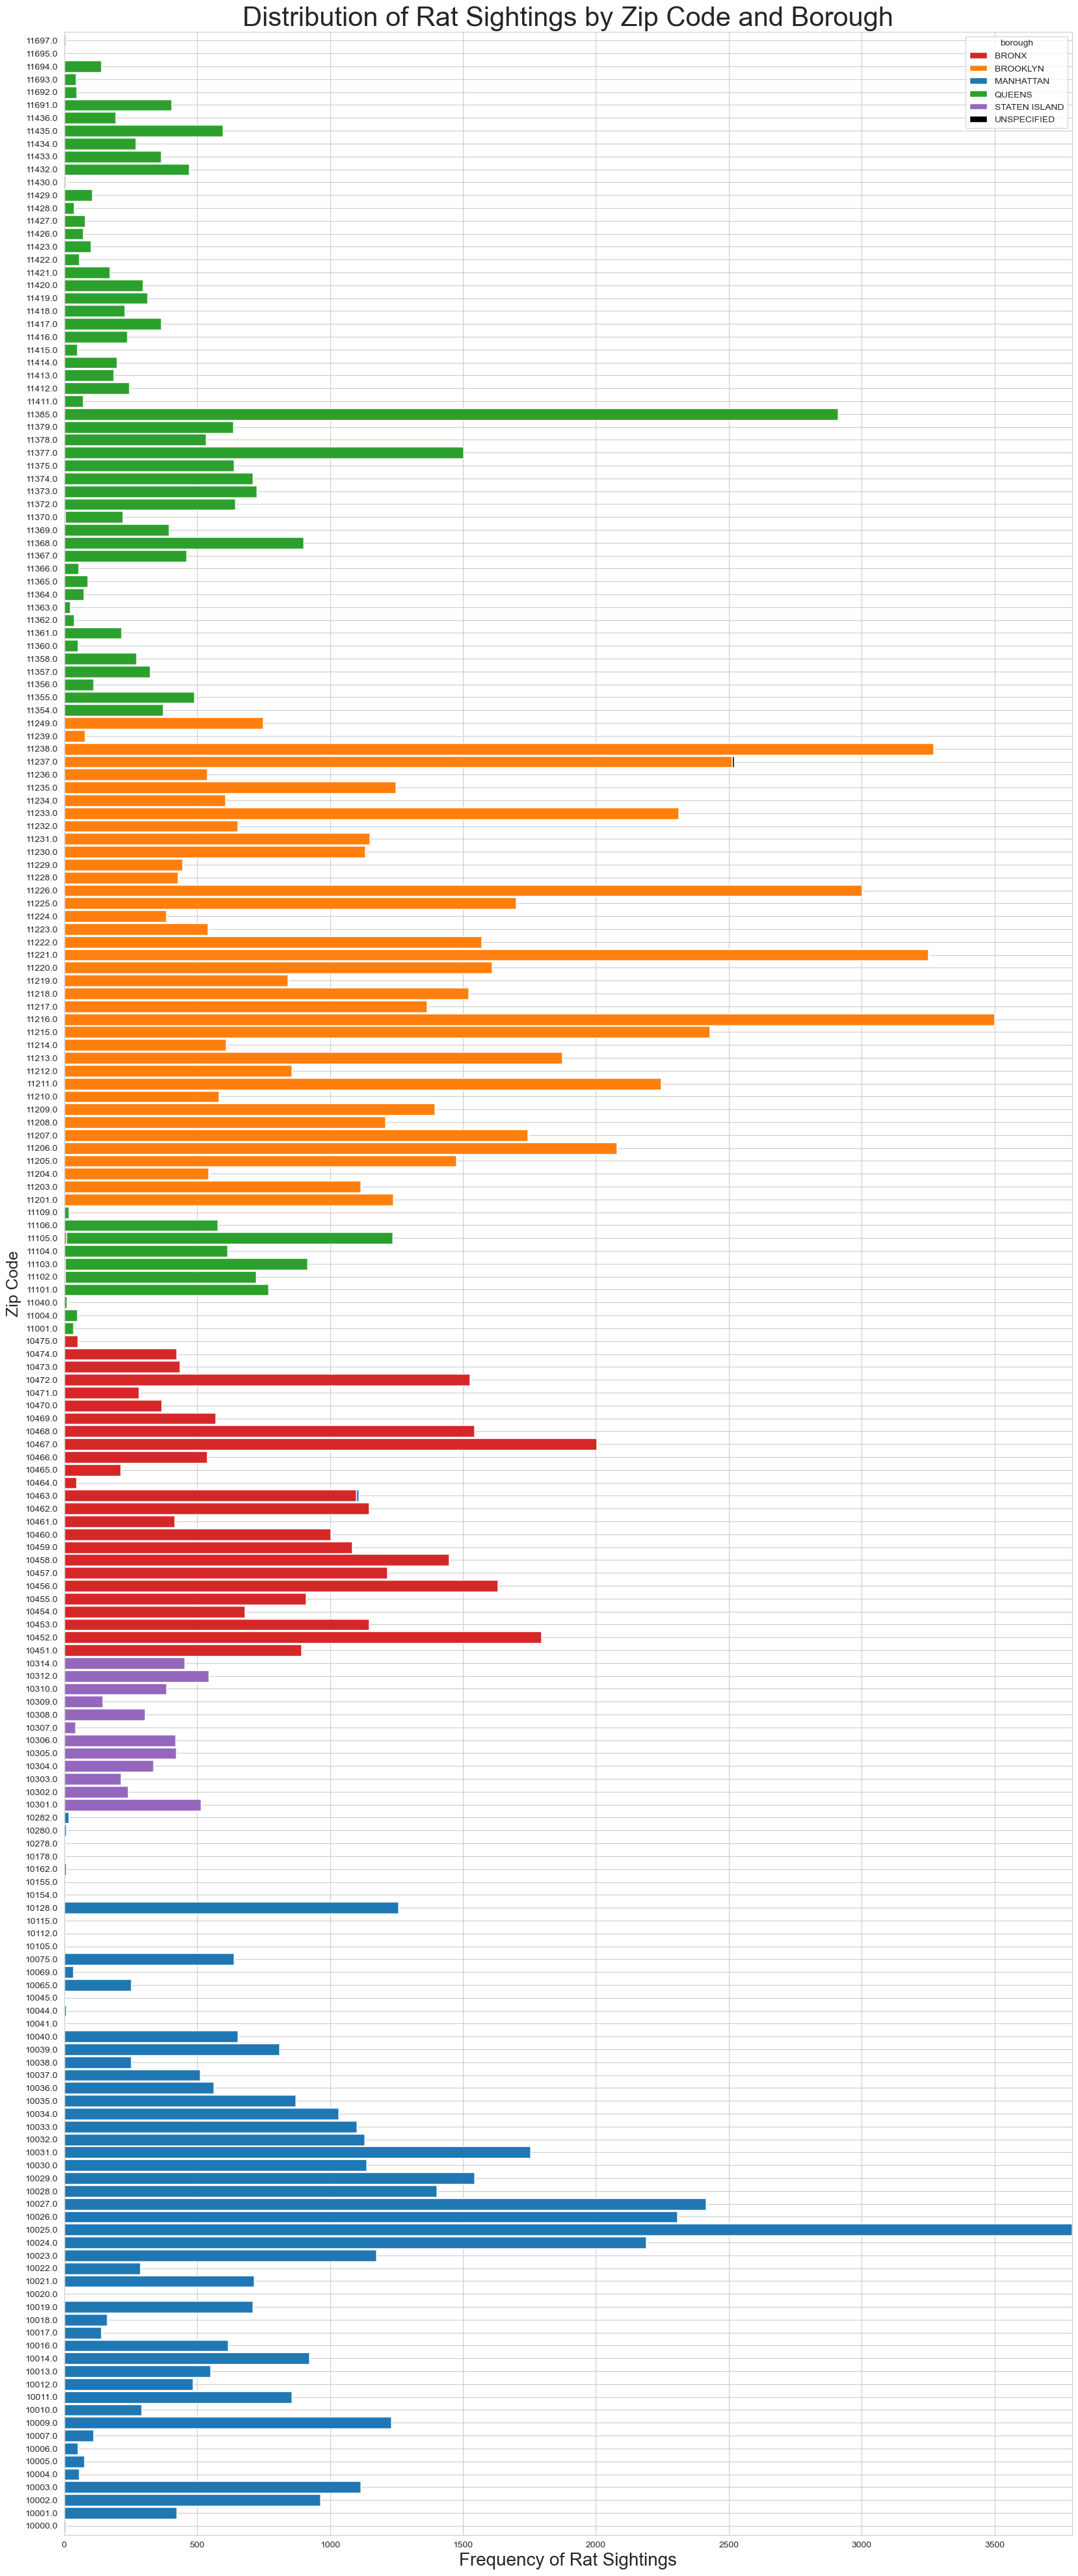

In [102]:
df_plot = rs.dropna(subset=['incident_zip', 'borough']).copy()
df_plot['incident_zip'] = df_plot['incident_zip'].astype(str)
df_plot['borough'] = df_plot['borough'].str.strip().str.upper()

# Aggregate counts
agg = df_plot.groupby(['incident_zip', 'borough']).size().unstack(fill_value=0)

colors = {
    'MANHATTAN': '#1f77b4',
    'BROOKLYN': '#ff7f0e',
    'QUEENS': '#2ca02c',
    'BRONX': '#d62728',
    'STATEN ISLAND': '#9467bd',
    'UNSPECIFIED' :  "#000000"
}

agg.plot(kind='barh', stacked=True, figsize=(20,50),
         color=[colors[b] for b in agg.columns], width = 0.9)

plt.title("Distribution of Rat Sightings by Zip Code and Borough", fontsize=30)
plt.xlabel("Frequency of Rat Sightings", fontsize=20)
plt.ylabel("Zip Code", fontsize=18)
plt.show()

<Axes: >

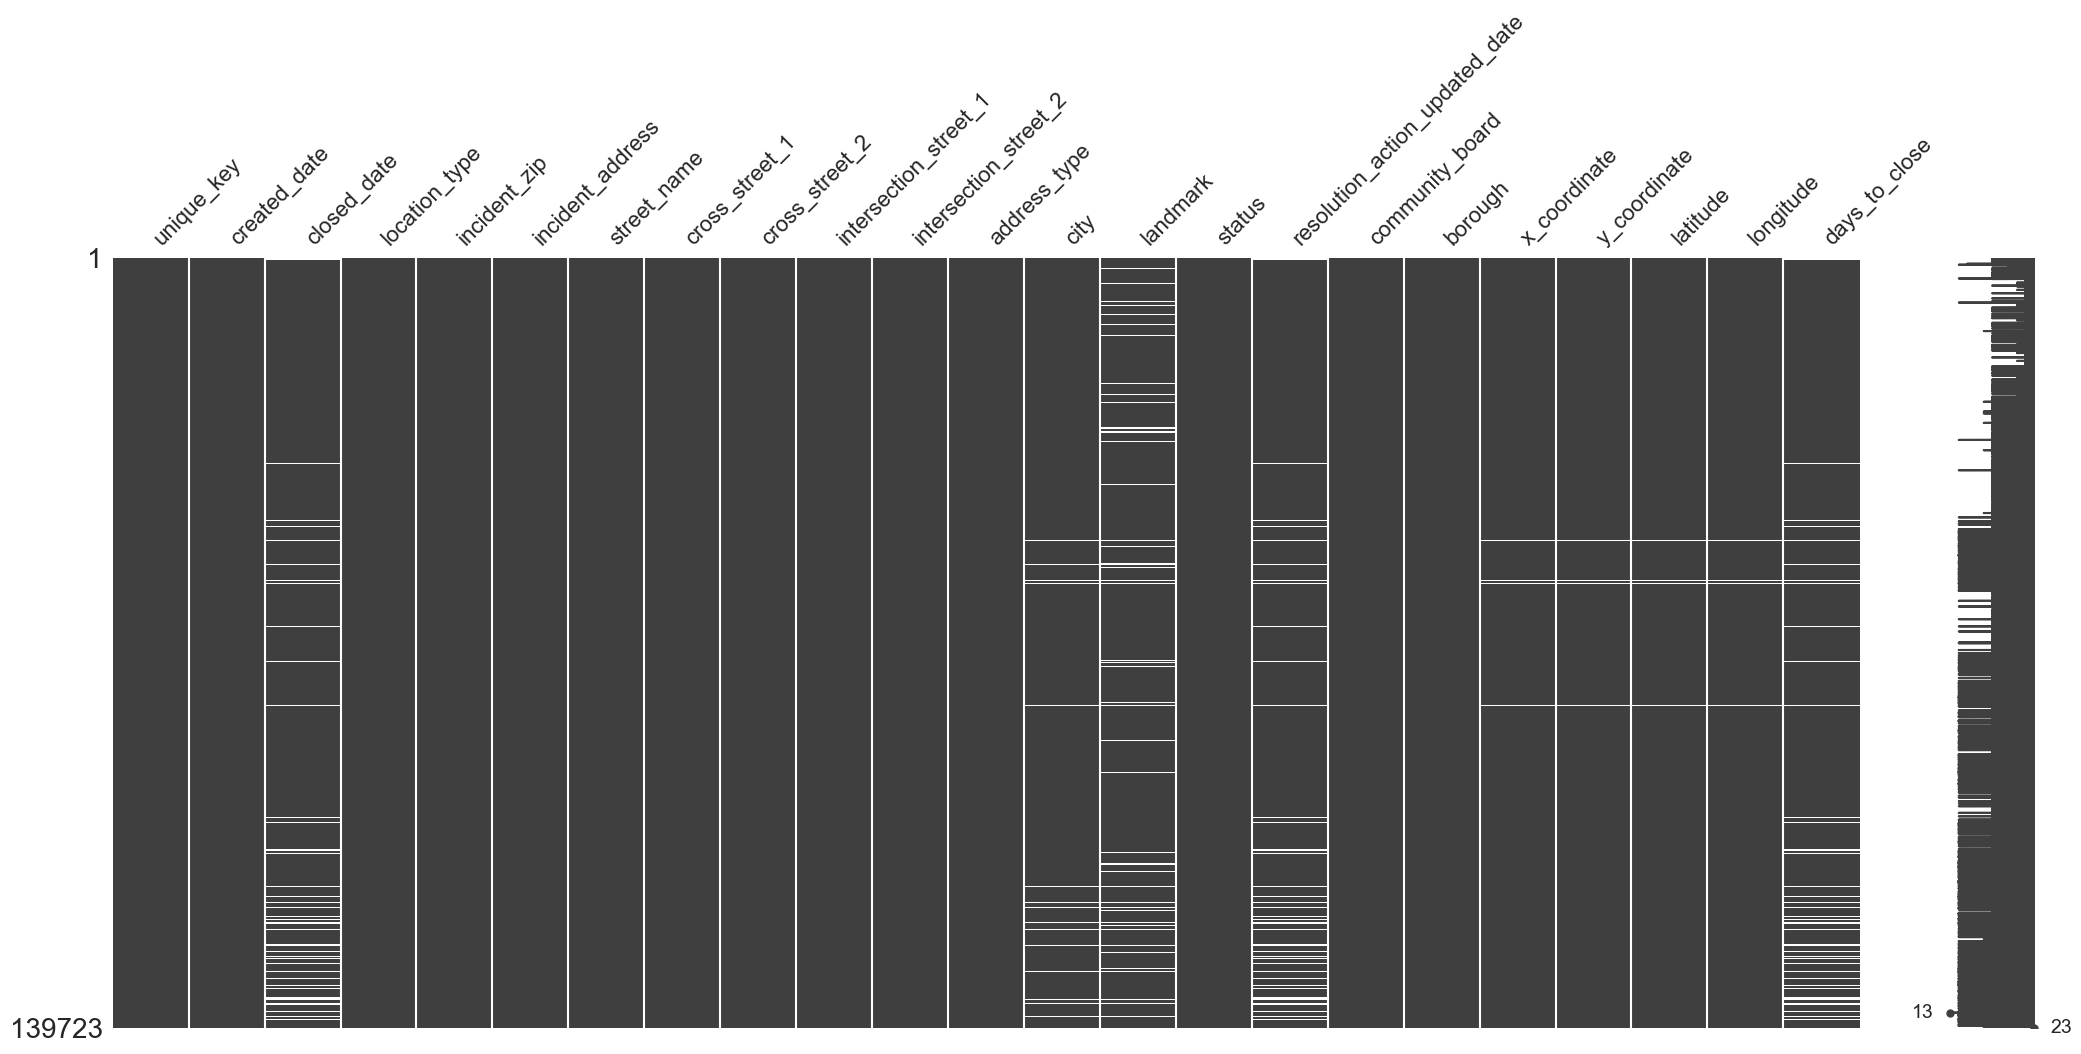

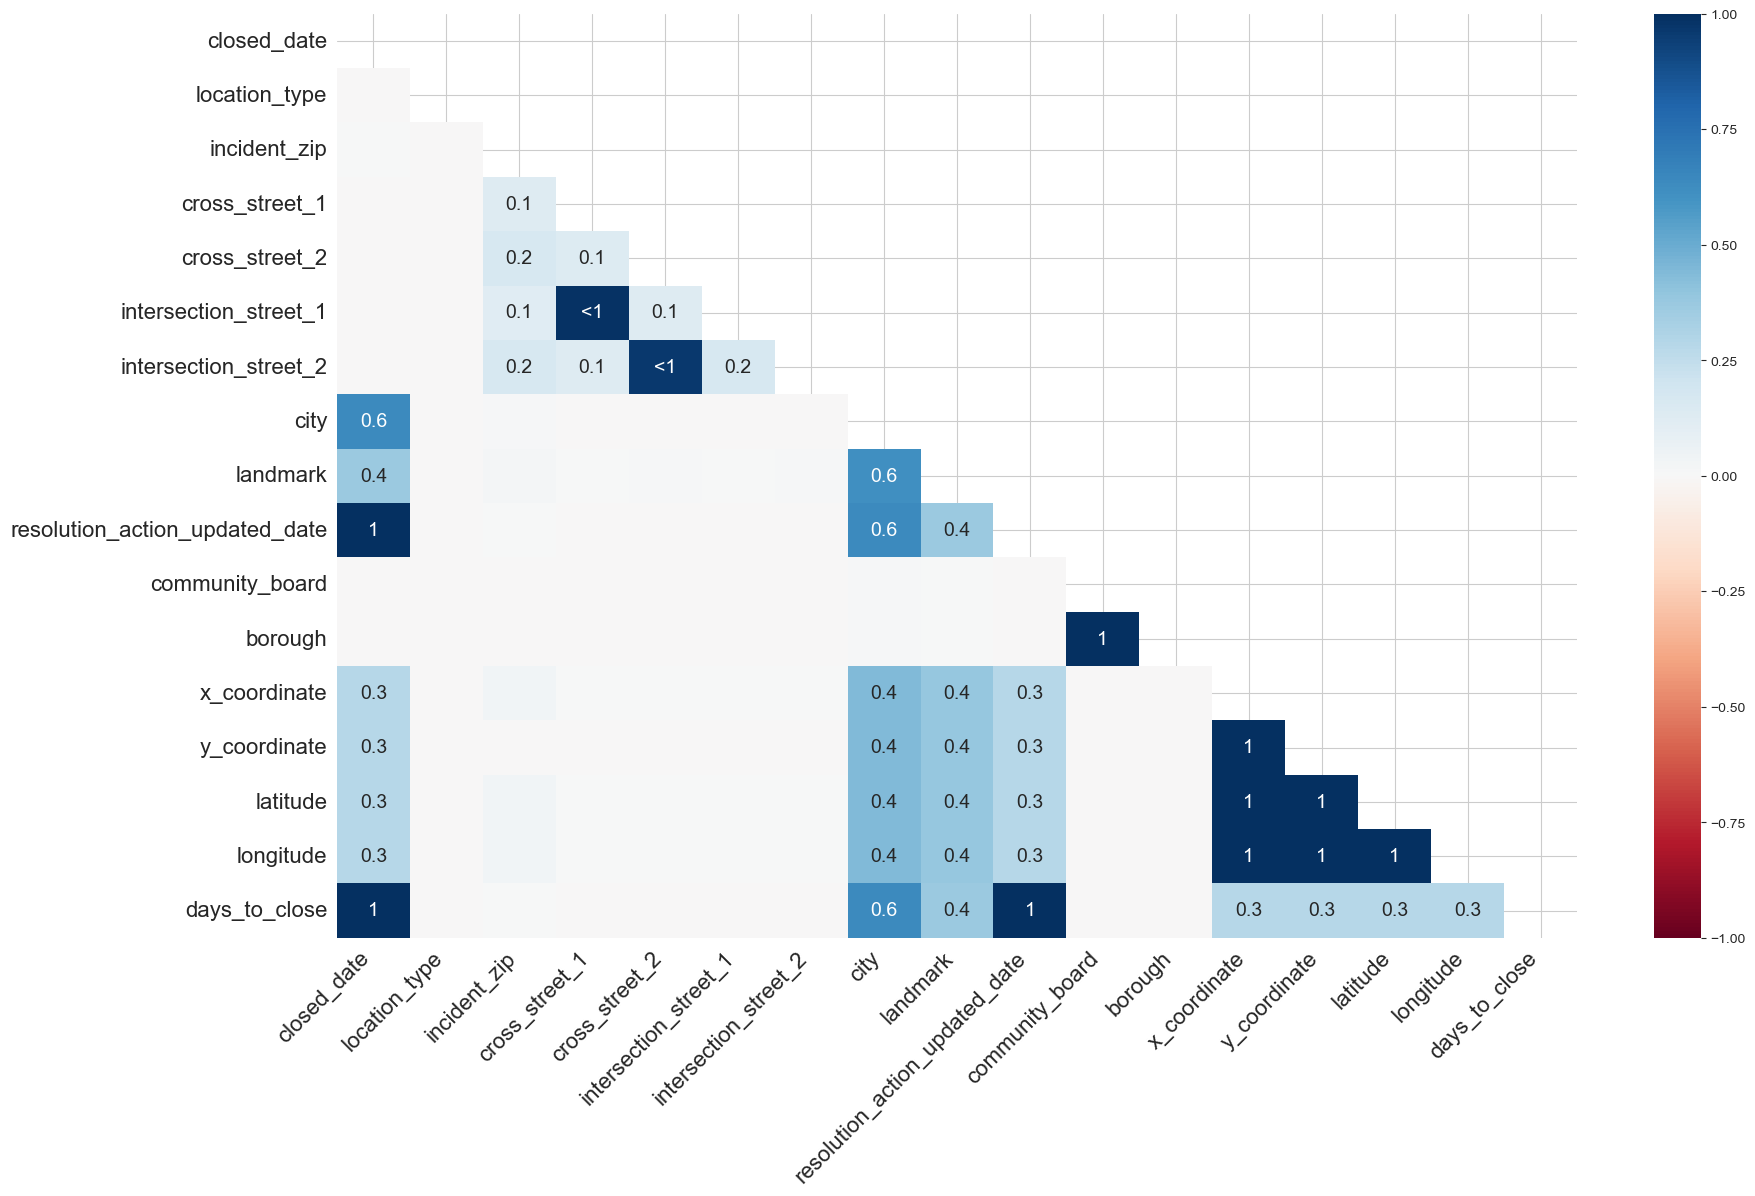

In [18]:
msno.matrix(rs)
msno.heatmap(rs)

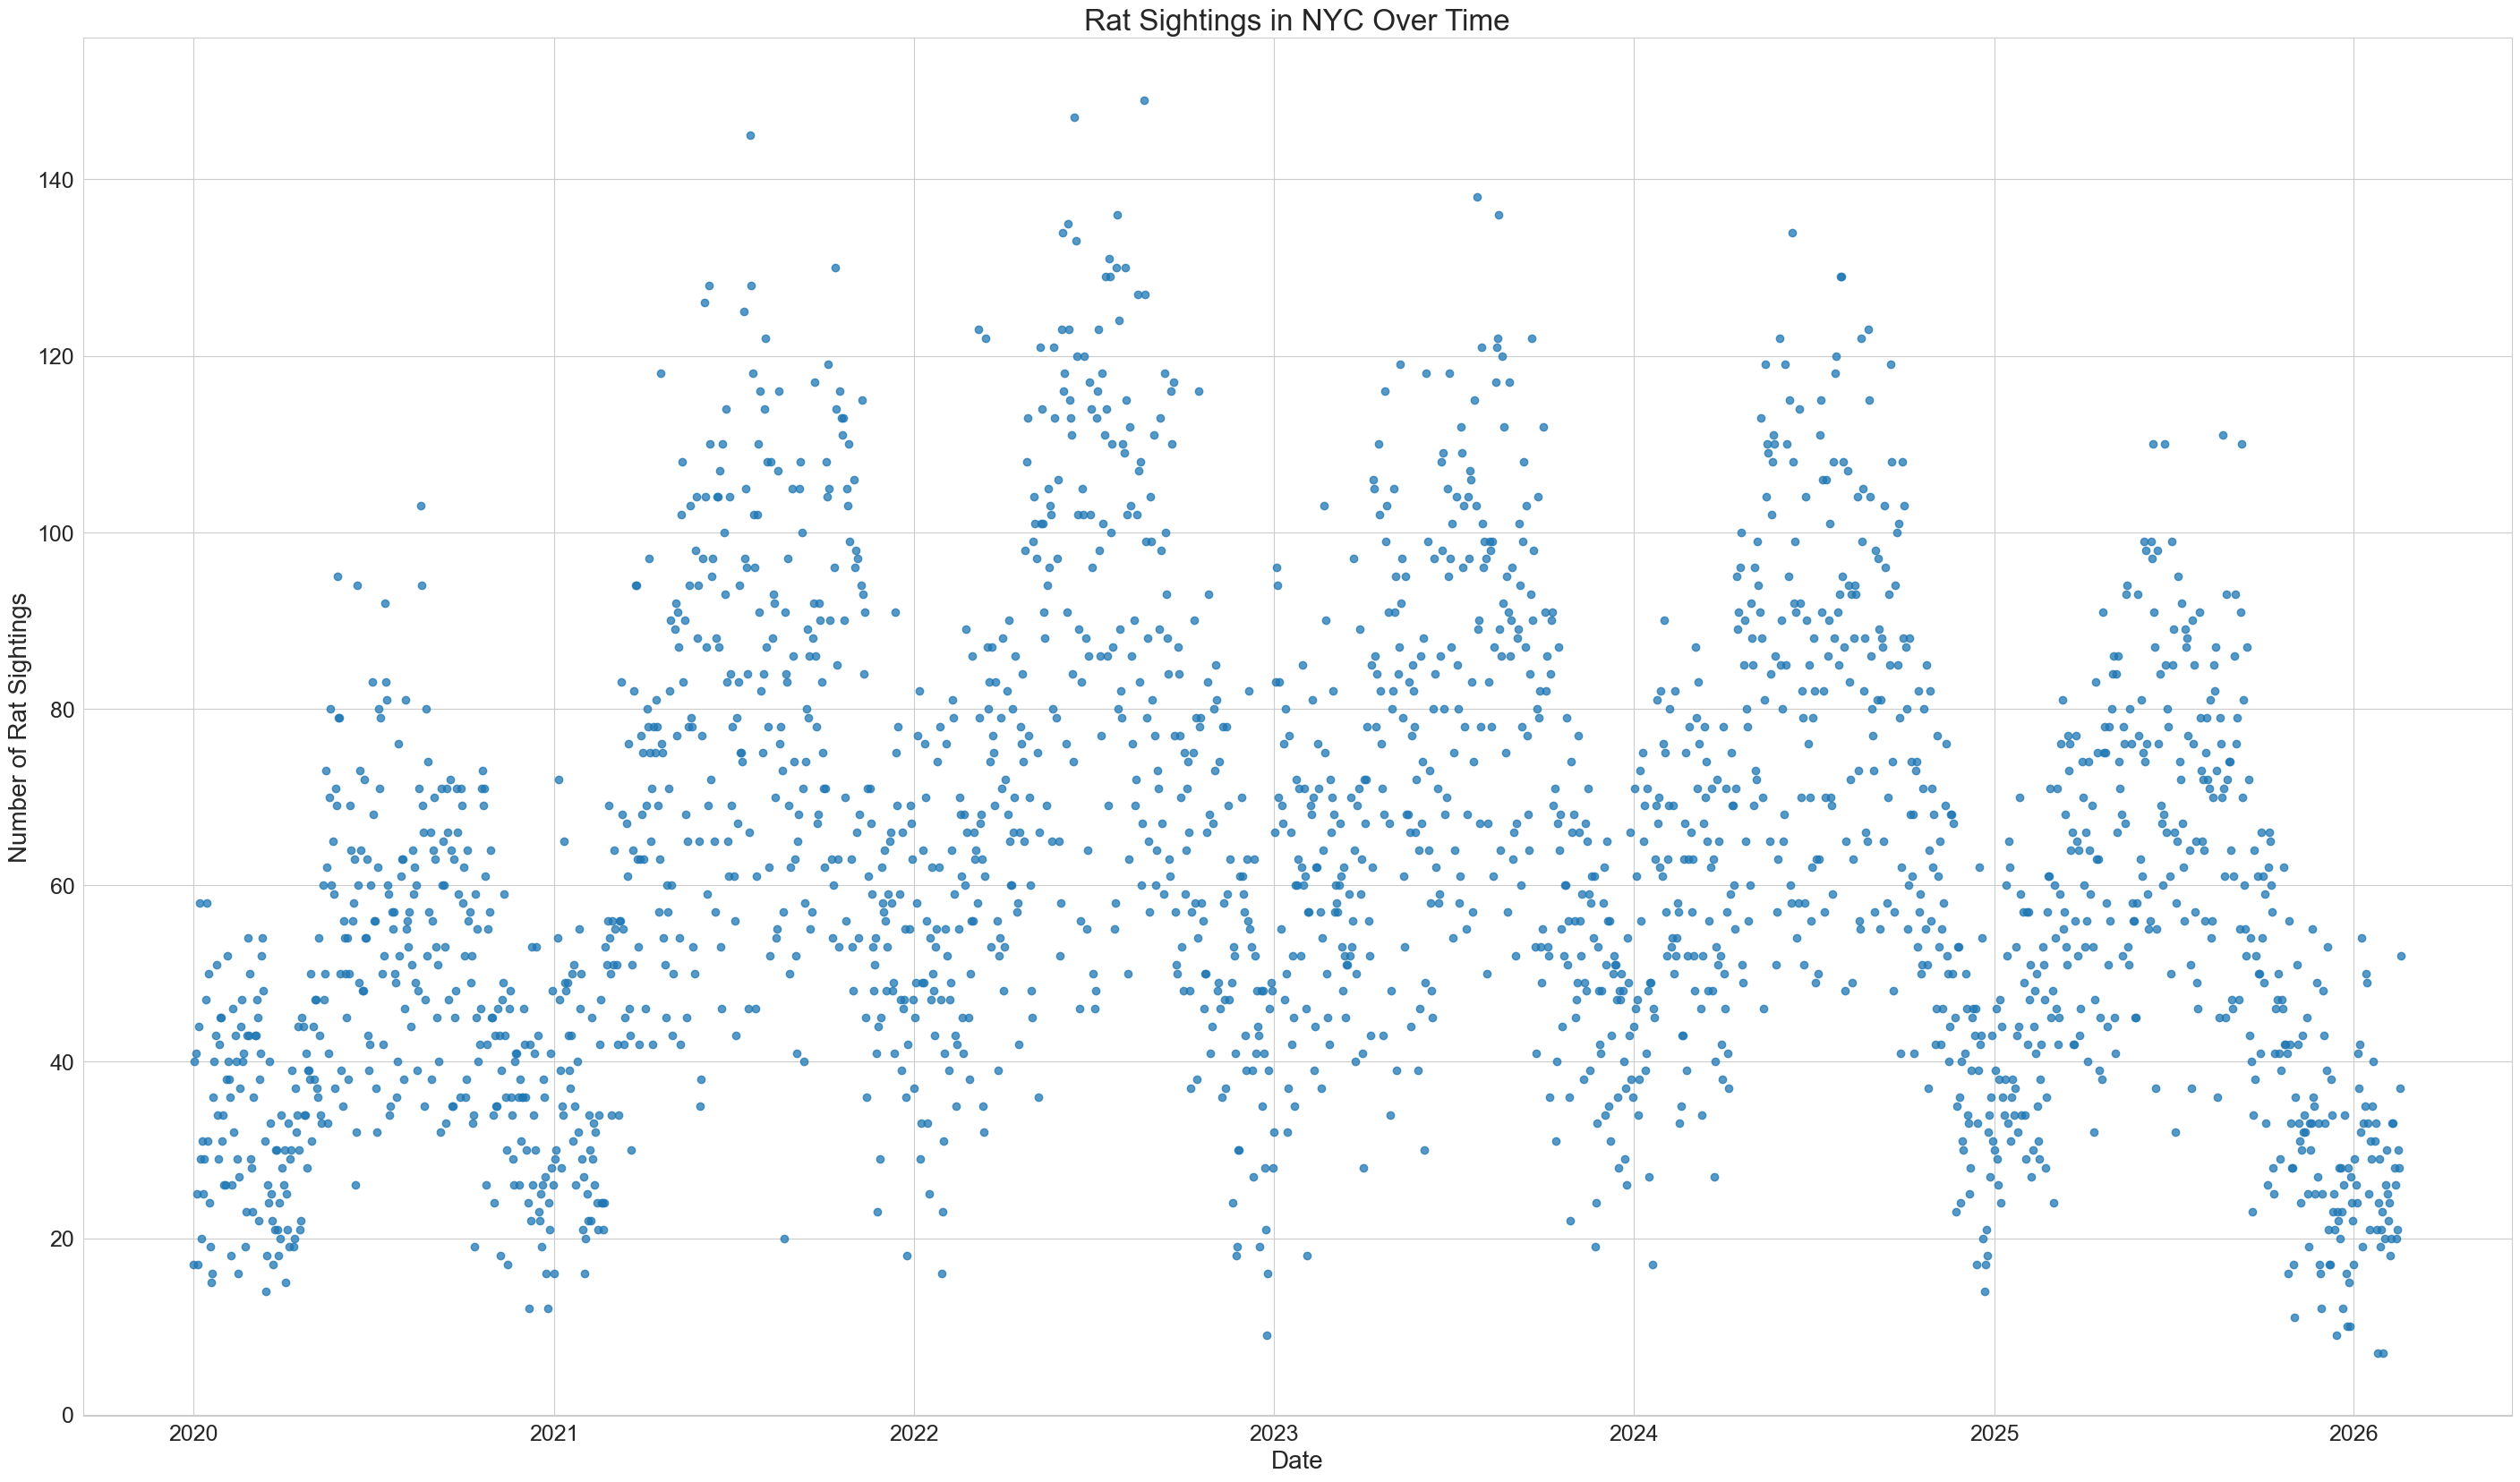

In [21]:
rs['created_date'] = pd.to_datetime(rs['created_date']) 
rs['closed_date'] = pd.to_datetime(rs['closed_date'])
rs['resolution_action_updated_date'] = pd.to_datetime(rs['resolution_action_updated_date'])

cdate_rat = rs.groupby(rs['created_date'].dt.date).size().reset_index(name='count')

plt.figure(figsize=(35,20))
plt.plot(cdate_rat['created_date'], cdate_rat['count'], 'o', alpha=0.75)
plt.xlabel("Date", fontsize=20)
plt.ylabel("Number of Rat Sightings", fontsize=20)
plt.title("Rat Sightings in NYC Over Time", fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

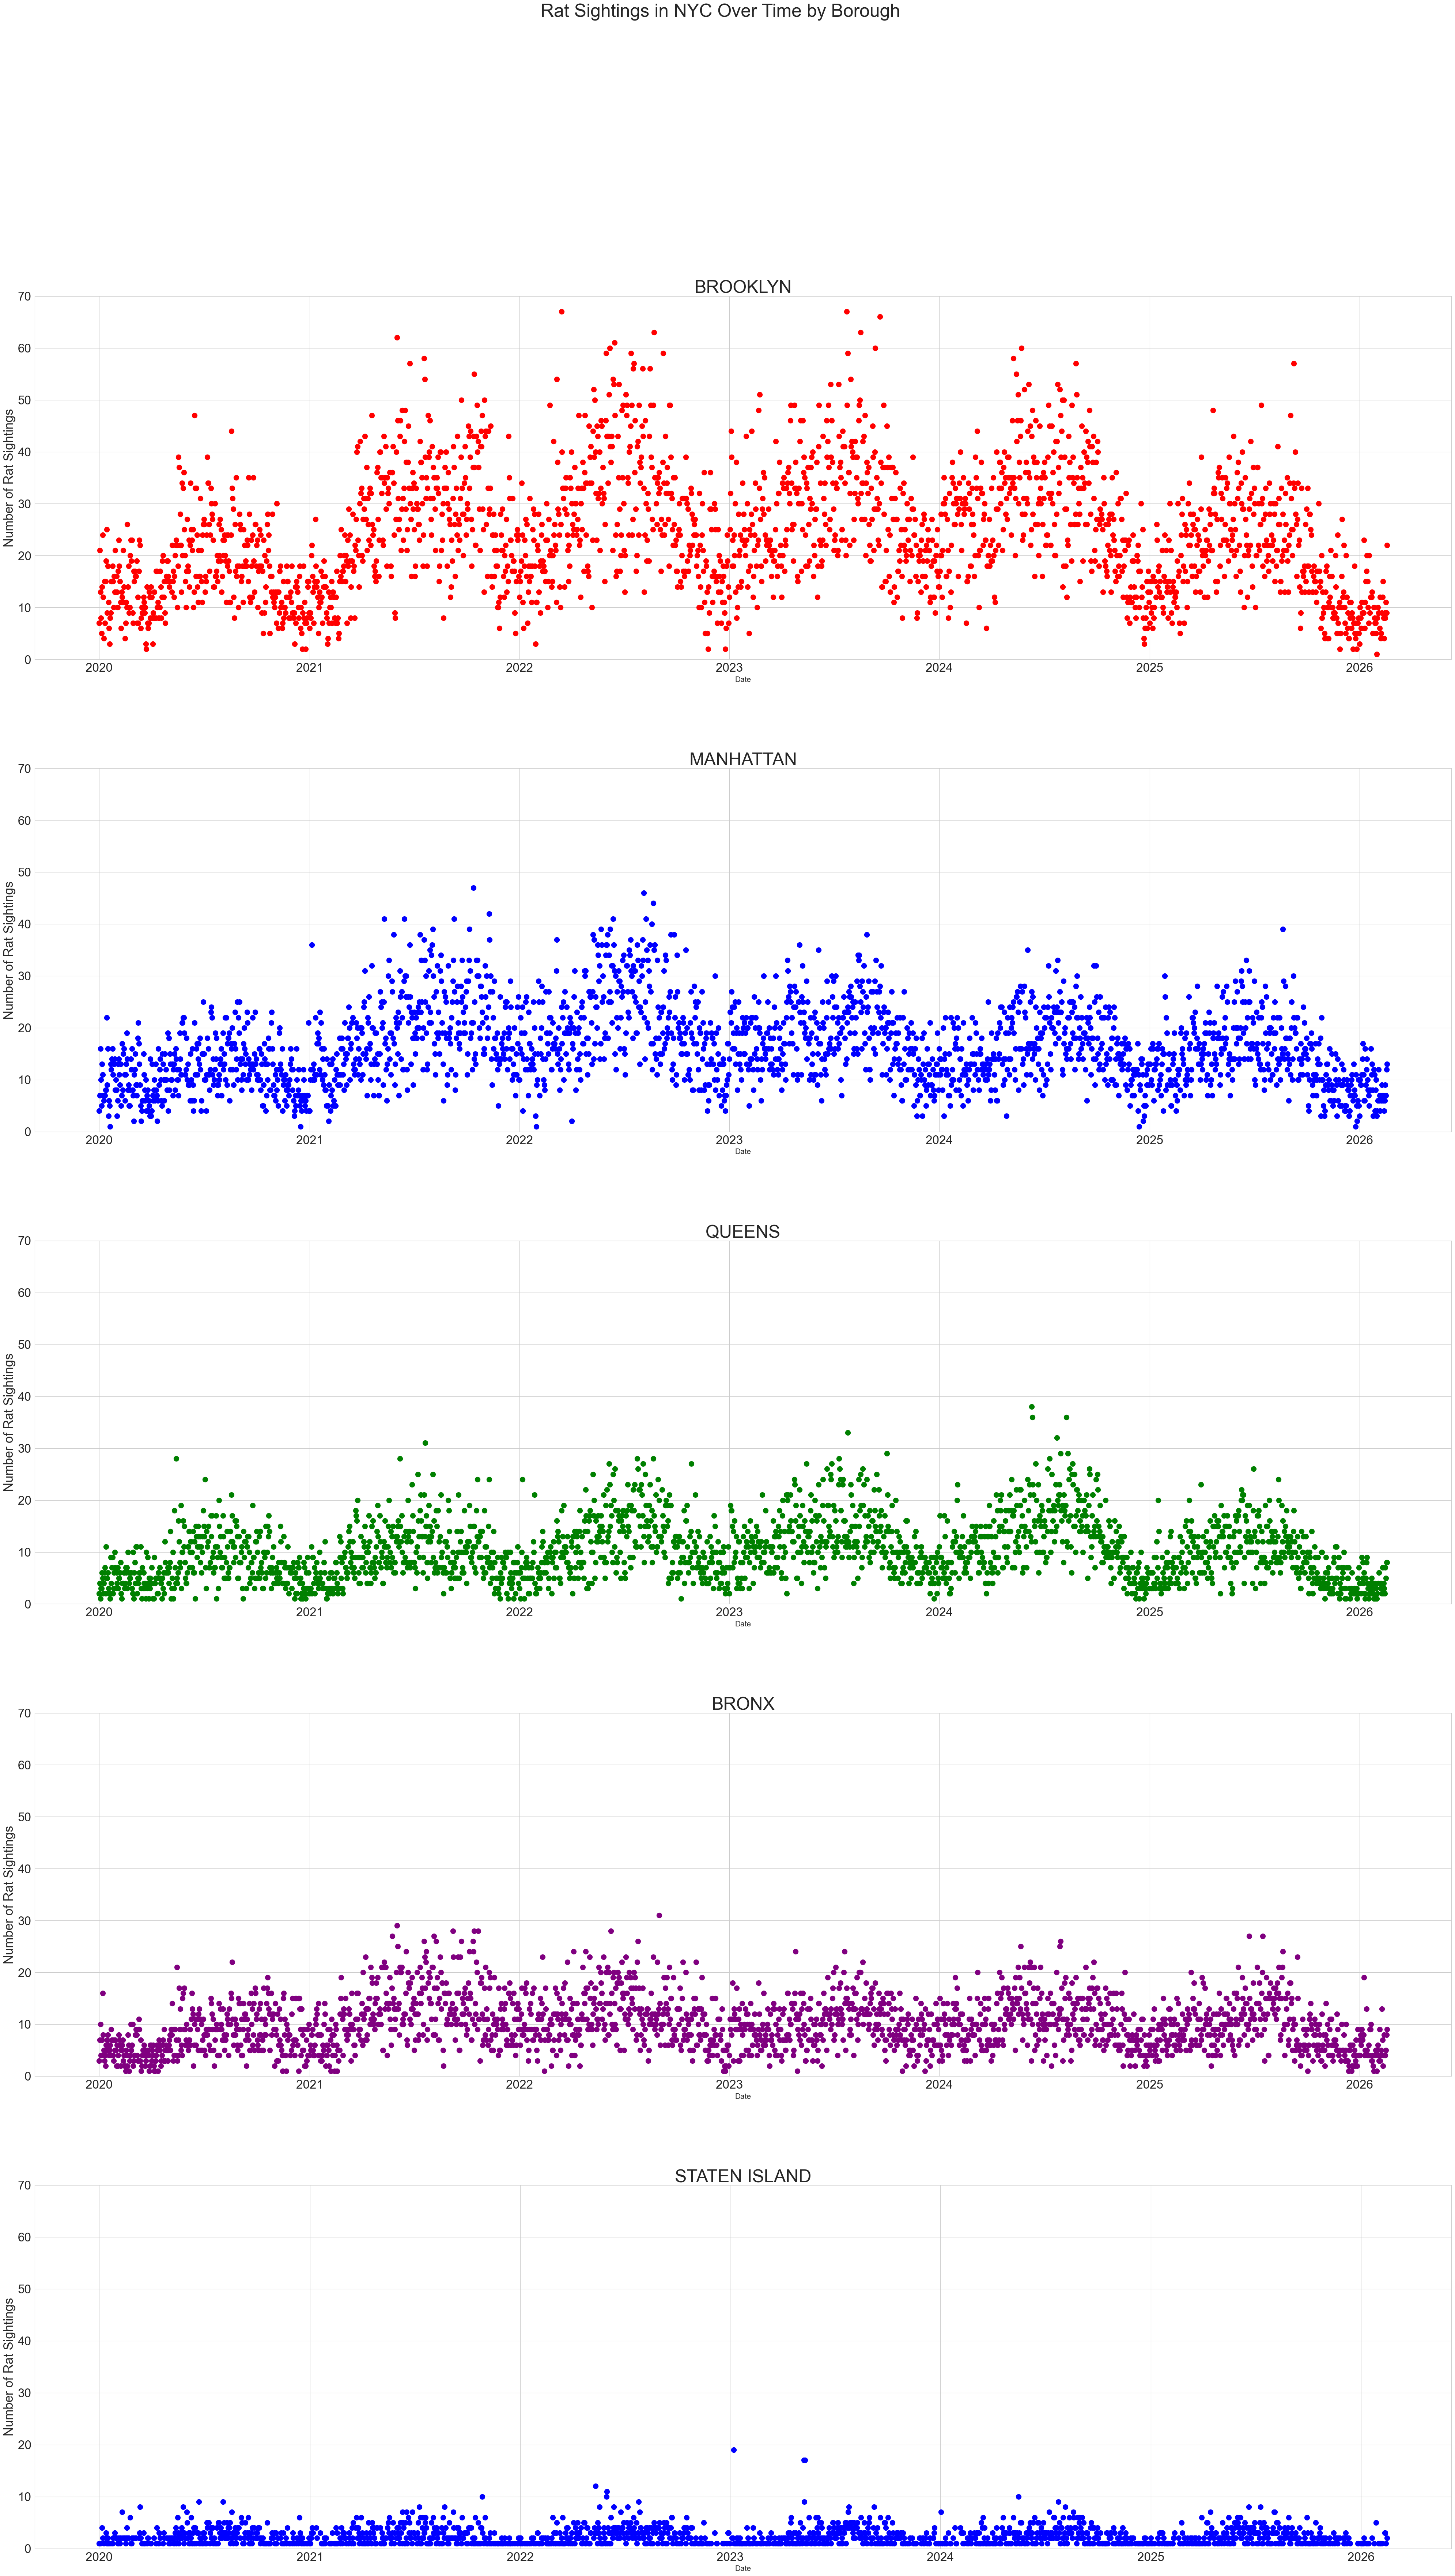

In [47]:
# Group by date and borough
cdate_borough = rs.groupby([rs['created_date'].dt.date, 'borough']).size().reset_index(name='count')

# Get the list of valid boroughs
boroughs = [b for b in rs['borough'].unique() if pd.notnull(b) and b != 'Unspecified']

# Create a 2x2 subplot (4 plots)

fig = plt.figure(figsize=(50,80))
gs = gridspec.GridSpec(5,1, figure=fig, wspace=0.3, hspace=0.3)

colors = ["r", "b", "g", "purple", "b"]

for i, borough in enumerate(boroughs):
    ax = fig.add_subplot(gs[i])
    borough_data = cdate_borough[cdate_borough['borough'] == borough]
    ax.plot(borough_data['created_date'], borough_data['count'], 'o', color=colors[i], markersize=10)
    ax.set_title(f"{borough}", fontsize=35)
    ax.set_xlabel("Date", fontsize=15)
    ax.set_ylabel("Number of Rat Sightings", fontsize=25)
    ax.grid(True)
    ax.set_ylim(0,70)
    ax.tick_params(axis='x', labelsize=24)
    ax.tick_params(axis='y', labelsize=24)

plt.suptitle("Rat Sightings in NYC Over Time by Borough", fontsize=36)
plt.show()

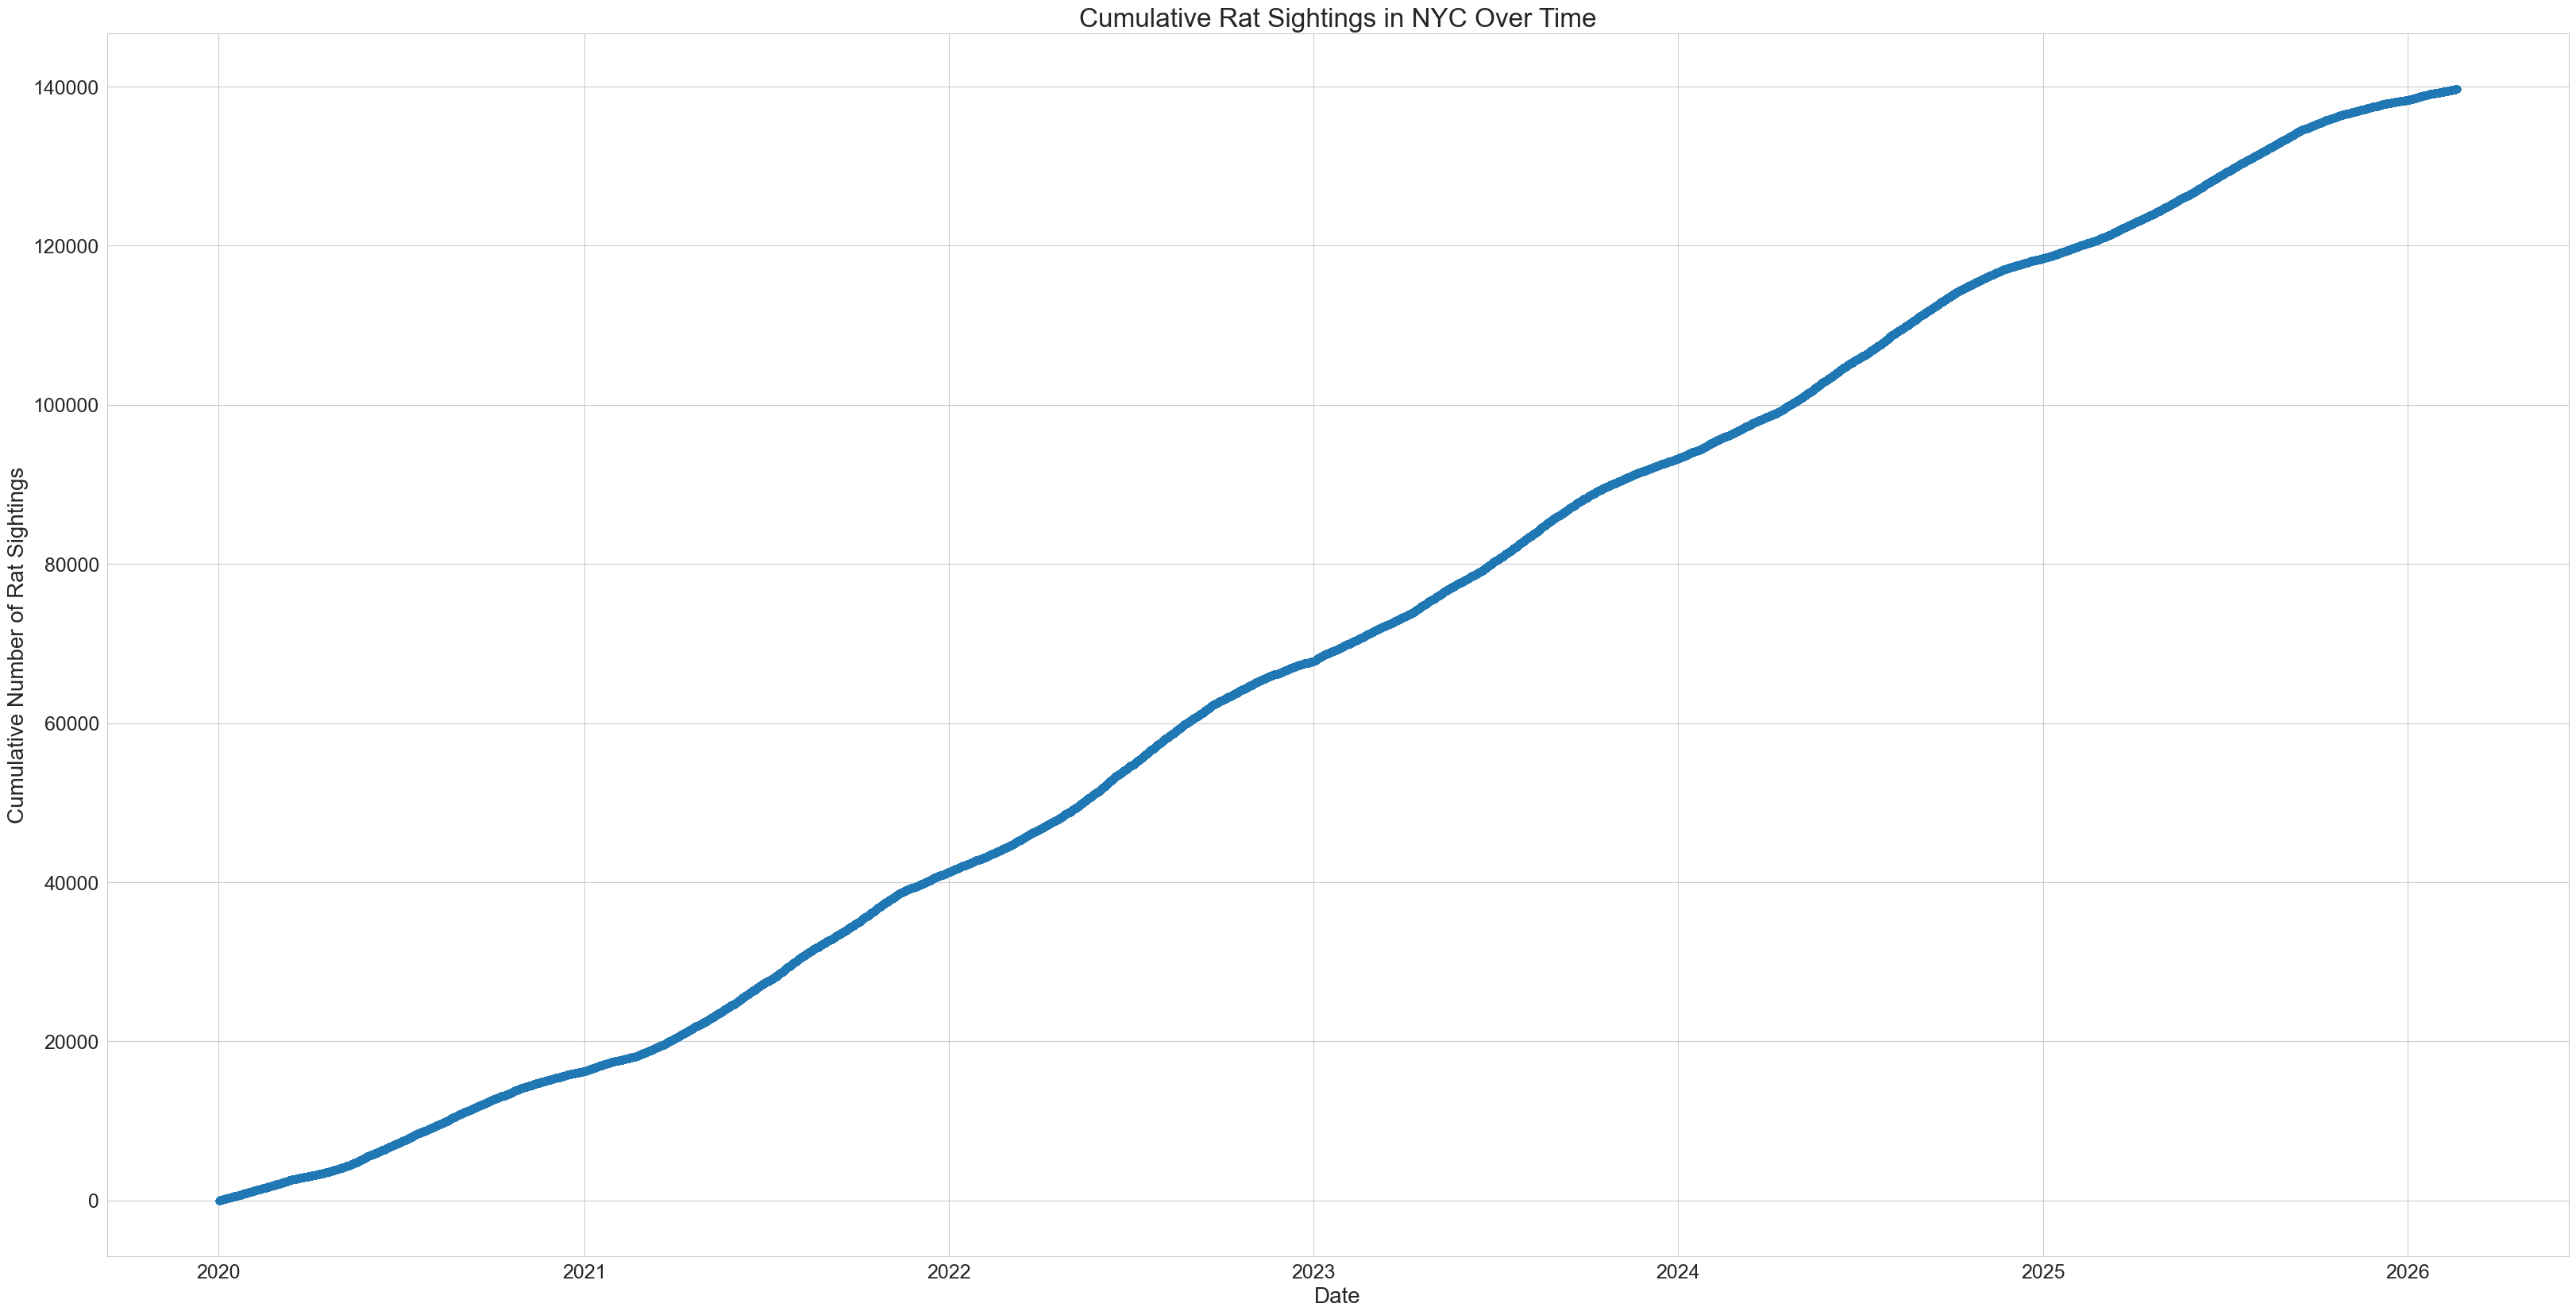

In [50]:
# plot the cumulative number of rats seen since 2020.
rs['created_date'] = pd.to_datetime(rs['created_date'])
rs = rs.sort_values('created_date')
rs['cumulative_count'] = np.arange(1, len(rs) + 1)
plt.figure(figsize=(40,20))
plt.plot(rs['created_date'], rs['cumulative_count'], 'o', alpha=0.75)
plt.xlabel("Date", fontsize=20)
plt.ylabel("Cumulative Number of Rat Sightings", fontsize=20)
plt.title("Cumulative Rat Sightings in NYC Over Time", fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()